In [2]:
import pandas as pd

In [3]:
!pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.0 MB/s eta 0:00:00


In [3]:
from Bio import SeqIO

In [18]:
viroids = pd.DataFrame()
IDs=[]
Seqs=[]

for row in SeqIO.parse('../raw_data/viroids.fasta','fasta'):
    IDs.append(row.id)
    Seqs.append(row.seq)
    
viroids['ID'] = IDs
viroids['Sequence'] = Seqs
viroids['IsViroid'] = 1

In [19]:
viruses = pd.DataFrame()
IDs=[]
Seqs=[]

for row in SeqIO.parse('../raw_data/virus.fasta','fasta'):
    IDs.append(row.id)
    Seqs.append(row.seq)
    
viruses['ID'] = IDs
viruses['Sequence'] = Seqs
viruses['IsViroid'] = 0

In [23]:
len(viruses) + len(viroids)

19397

In [24]:
df_final = viroids.merge(viruses, how="outer")

In [39]:
seqs=[]
for seq in df_final['Sequence']:
    seq = str(seq)
    seqs.append(seq)
df_final['Sequence'] = seqs

In [45]:
df_final['Length'] = [len(df_final['Sequence'][i]) for i in range(len(df_final))]
df_final

,ID,Sequence,IsViroid,Length
0,NC_039241.1,GGGTGGTGTGTGCCACCCCTGATGAGACCGAAAGGTCGAAATGGGG...,1,333
1,NC_003540.1,GGCACCTGACGTCGGTGTCCTGATGAAGATCCATGACAGGATCGAA...,1,399
2,NC_003636.1,GTCATAAGTTTCGTCGCATTTCAGCGACTCATCAGTGGGCTTAGCC...,1,337
3,NC_001410.1,TTTATTAGAACAAGAAGTGAGGATATGATTAAACTTTGTTTGACGA...,1,247
4,MW046337.1,CCCGATAGAAAGGCTAAGCACCTCGCAATGACGTAAGGTGGGACTT...,1,339
...,...,...,...,...
19392,MF066697.1_282_203,GCGGAGTTCCACATCGGCGGACGCGACGACATACGATTGTGTGCCG...,0,282
19393,AY624020.1_401_15,GCTTAGGCATTTTGAATTAAATCCAGTGGGCCAAAGCCTCTTTAAT...,0,401
19394,MW574021.1_304_437,CATCCCTAAGGGATGTGTTGGTCCCTGTAAGGTACAGGATTACGAA...,0,304
19395,KP313717.1_404_119,CCCAGGATCTATCGGACGTTGAGGACGCCTGATGTTCCAAGAGGTT...,0,404


<AxesSubplot:>

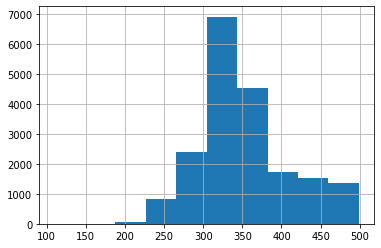

In [48]:
df_final['Length'].hist()
df_final.to_csv("../Project_Viroid/data/df_final.csv")

In [3]:
df_final = pd.read_csv("../Project_Viroid/data/df_final.csv")
df_final= df_final.drop ("Unnamed: 0", axis=1)
df_final

,ID,Sequence,IsViroid,Length
0,NC_039241.1,GGGTGGTGTGTGCCACCCCTGATGAGACCGAAAGGTCGAAATGGGG...,1,333
1,NC_003540.1,GGCACCTGACGTCGGTGTCCTGATGAAGATCCATGACAGGATCGAA...,1,399
2,NC_003636.1,GTCATAAGTTTCGTCGCATTTCAGCGACTCATCAGTGGGCTTAGCC...,1,337
3,NC_001410.1,TTTATTAGAACAAGAAGTGAGGATATGATTAAACTTTGTTTGACGA...,1,247
4,MW046337.1,CCCGATAGAAAGGCTAAGCACCTCGCAATGACGTAAGGTGGGACTT...,1,339
...,...,...,...,...
19392,MF066697.1_282_203,GCGGAGTTCCACATCGGCGGACGCGACGACATACGATTGTGTGCCG...,0,282
19393,AY624020.1_401_15,GCTTAGGCATTTTGAATTAAATCCAGTGGGCCAAAGCCTCTTTAAT...,0,401
19394,MW574021.1_304_437,CATCCCTAAGGGATGTGTTGGTCCCTGTAAGGTACAGGATTACGAA...,0,304
19395,KP313717.1_404_119,CCCAGGATCTATCGGACGTTGAGGACGCCTGATGTTCCAAGAGGTT...,0,404


In [4]:
# recherche et décompte des valeurs hors A,C,T,G
unknown = []
for row in df_final.Sequence :
    for car in row:
        if car not in ["A","C","T","G"]:
            unknown.append(car)
unknown = pd.DataFrame(unknown)
unknown = unknown.value_counts()
unknown

N    118
Y     86
R     81
M     20
W     16
K     12
S     11
H      1
dtype: int64

In [5]:
# Remplacement des données manquante par le caractére générique "-"
replace_list =["N","Y","R","M","W","K","S","H"]
df_final.Sequence = df_final.Sequence.replace(replace_list, "-", regex=True)

In [6]:
# recherche et décompte des valeurs hors A,C,T,G, vérification des remplacements
unknown = []
for row in df_final.Sequence :
    for car in row:
        if car not in ["A","C","T","G"]:
            unknown.append(car)
unknown = pd.DataFrame(unknown)
unknown = unknown.value_counts()
unknown

-    345
dtype: int64

In [7]:
# Décompte du nombre de séquence avec données manquantes
count = 0
for row in df_final.Sequence:
    if "-" in row:
        count+=1
count

138

In [8]:
"""
Pourcentage de séquences avec valeurs manquantes
0.71
"""
count/df_final.Sequence.count()*100

0.7114502242614837

In [9]:
df_final

,ID,Sequence,IsViroid,Length
0,NC_039241.1,GGGTGGTGTGTGCCACCCCTGATGAGACCGAAAGGTCGAAATGGGG...,1,333
1,NC_003540.1,GGCACCTGACGTCGGTGTCCTGATGAAGATCCATGACAGGATCGAA...,1,399
2,NC_003636.1,GTCATAAGTTTCGTCGCATTTCAGCGACTCATCAGTGGGCTTAGCC...,1,337
3,NC_001410.1,TTTATTAGAACAAGAAGTGAGGATATGATTAAACTTTGTTTGACGA...,1,247
4,MW046337.1,CCCGATAGAAAGGCTAAGCACCTCGCAATGACGTAAGGTGGGACTT...,1,339
...,...,...,...,...
19392,MF066697.1_282_203,GCGGAGTTCCACATCGGCGGACGCGACGACATACGATTGTGTGCCG...,0,282
19393,AY624020.1_401_15,GCTTAGGCATTTTGAATTAAATCCAGTGGGCCAAAGCCTCTTTAAT...,0,401
19394,MW574021.1_304_437,CATCCCTAAGGGATGTGTTGGTCCCTGTAAGGTACAGGATTACGAA...,0,304
19395,KP313717.1_404_119,CCCAGGATCTATCGGACGTTGAGGACGCCTGATGTTCCAAGAGGTT...,0,404


In [10]:
df_final.to_csv("../Project_Viroid/data/df_final_v2.csv")

In [11]:
print(f"Sequence min : {df_final.Length.min()}, Sequence max : {df_final.Length.max()}, Nombre de sequence unique : {df_final.Sequence.nunique()}/{df_final.Sequence.count()}, Nombre d id unique : {df_final.ID.nunique()}/{df_final.Sequence.count()}")

Sequence min : 110, Sequence max : 499, Nombre de sequence unique : 19397/19397, Nombre d id unique : 19397/19397


In [12]:
car_counter = {"A":0, "C":0, "T":0, "G":0, "-":0 }

In [13]:
for row in df_final.Sequence:
    for car in row :
        car_counter[car]+=1

In [38]:
car_counter

{'A': 1782669, 'C': 1650395, 'T': 1715660, 'G': 1743067, '-': 345}

<AxesSubplot:>

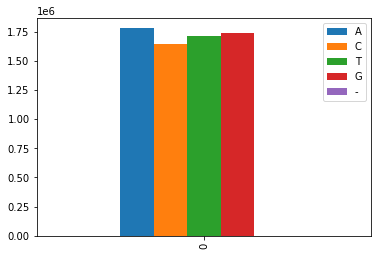

In [40]:
car_counter_df = pd.DataFrame.from_dict(car_counter, orient="index").T
car_counter_df.plot(kind='bar')

,A,C,T,G,-
A,1782669,1650395,1715660,1743067,345
C,1782669,1650395,1715660,1743067,345
T,1782669,1650395,1715660,1743067,345
G,1782669,1650395,1715660,1743067,345
-,1782669,1650395,1715660,1743067,345


<bound method hist_frame of          A        C        T        G    -
A  1782670  1650396  1715661  1743068  346
C  1782670  1650396  1715661  1743068  346
T  1782670  1650396  1715661  1743068  346
G  1782670  1650396  1715661  1743068  346
-  1782670  1650396  1715661  1743068  346>